## Description
Founded in 2000 by a Bronx history teacher, DonorsChoose.org has raised $685 million for America's classrooms. Teachers at three-quarters of all the public schools in the U.S. have come to DonorsChoose.org to request what their students need, making DonorsChoose.org the leading platform for supporting public education.

To date, 3 million people and partners have funded 1.1 million DonorsChoose.org projects. But teachers still spend more than a billion dollars of their own money on classroom materials. To get students what they need to learn, the team at DonorsChoose.org needs to be able to connect donors with the projects that most inspire them.

In the second Kaggle Data Science for Good challenge, DonorsChoose.org, in partnership with Google.org, is inviting the community to help them pair up donors to the classroom requests that will most motivate them to make an additional gift. To support this challenge, DonorsChoose.org has supplied anonymized data on donor giving from the past five years. The winning methods will be implemented in DonorsChoose.org email marketing campaigns.

Link to data: https://www.kaggle.com/donorschoose/io

## Problem Statement
DonorsChoose.org has funded over 1.1 million classroom requests through the support of 3 million donors, the majority of whom were making their first-ever donation to a public school. If DonorsChoose.org can motivate even a fraction of those donors to make another donation, that could have a huge impact on the number of classroom requests fulfilled.

A good solution will enable DonorsChoose.org to build targeted email campaigns recommending specific classroom requests to prior donors. Part of the challenge is to assess the needs of the organization, uncover insights from the data available, and build the right solution for this problem. Submissions will be evaluated on the following criteria:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import calendar
import seaborn as sns
import datetime
from scipy import stats
from statistics import variance
from statsmodels.stats.proportion import proportions_ztest
import gc

donations = pd.read_csv('Donations.csv')
donors = pd.read_csv('Donors.csv',low_memory=False)
schools = pd.read_csv('Schools.csv',error_bad_lines=False)
teachers = pd.read_csv('Teachers.csv',error_bad_lines=False)
projects = pd.read_csv('Projects.csv',error_bad_lines=False)
resources = pd.read_csv('Resources.csv',error_bad_lines=False,warn_bad_lines=False)

## Step 1: Data overview and Cleaning

In [ ]:
donations.head()

In [ ]:
donations.info()

In [4]:
donations.isnull().sum()

Project ID                             0
Donation ID                            0
Donor ID                               0
Donation Included Optional Donation    0
Donation Amount                        0
Donor Cart Sequence                    0
Donation Received Date                 0
dtype: int64

In [5]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [6]:
donors.shape

(2122640, 5)

In [7]:
donors.isnull().sum()
## Approx 10% of null in zip and city so dropping this rows.

Donor ID                 0
Donor City          213097
Donor State              0
Donor Is Teacher         0
Donor Zip           180060
dtype: int64

In [8]:
donors = donors.dropna(how ='any', axis=0)

In [9]:
donors.isnull().sum()

Donor ID            0
Donor City          0
Donor State         0
Donor Is Teacher    0
Donor Zip           0
dtype: int64

In [10]:
## Lets see how many donors are one time donors
d = donors['Donor ID'].value_counts().to_frame()
len(d[d['Donor ID']>1])

0

In [11]:
## Donars by city
donors['Donor City'].value_counts().to_frame().head(10)

,Donor City
Chicago,34352
New York,27863
Brooklyn,22330
Los Angeles,18320
San Francisco,16925
Houston,15839
Portland,13039
Seattle,12984
Atlanta,12537
Philadelphia,12381


In [12]:
schools.head()
#schools.shape

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [13]:
schools.isnull().sum()

School ID                          0
School Name                        0
School Metro Type                  0
School Percentage Free Lunch    1141
School State                       0
School Zip                         0
School City                      227
School County                      2
School District                    0
dtype: int64

In [14]:
schools = schools.dropna(how ='any',axis=0)

In [15]:
schools.isnull().sum()

School ID                       0
School Name                     0
School Metro Type               0
School Percentage Free Lunch    0
School State                    0
School Zip                      0
School City                     0
School County                   0
School District                 0
dtype: int64

In [16]:
teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [17]:
teachers.isnull().sum()

Teacher ID                            0
Teacher Prefix                       28
Teacher First Project Posted Date     0
dtype: int64

In [18]:
teachers.shape

(402900, 3)

In [19]:
teachers = teachers.dropna(how = 'any', axis=0)

In [20]:
projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [21]:
projects.isnull().sum()

Project ID                               0
School ID                                0
Teacher ID                               0
Teacher Project Posted Sequence          0
Project Type                             0
Project Title                            6
Project Essay                            1
Project Short Description                3
Project Need Statement                   3
Project Subject Category Tree           29
Project Subject Subcategory Tree        29
Project Grade Level Category             0
Project Resource Category               36
Project Cost                             0
Project Posted Date                      0
Project Expiration Date                 14
Project Current Status                   0
Project Fully Funded Date           283253
dtype: int64

In [22]:
resources.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


In [23]:
resources.shape
resources = resources.dropna(how='any',axis=0)

In [24]:
resources.isnull().sum()

Project ID              0
Resource Item Name      0
Resource Quantity       0
Resource Unit Price     0
Resource Vendor Name    0
dtype: int64

## Step 2. Statistical overview of the Data

#### Donation amount

In [25]:
pd.options.display.float_format = "{:.2f}".format
donations["Donation Amount"].describe()


count   4687884.00
mean         60.67
std         166.90
min           0.01
25%          14.82
50%          25.00
75%          50.00
max       60000.00
Name: Donation Amount, dtype: float64

Minimum donation amount is $0.01

Mean donation amount is  $60.67

Maximum donation amount is $60000


In [26]:
print("Total donation amount raised by Donorchoose is  " "${:.2f}".format(float(donations["Donation Amount"].sum())))

Total donation amount raised by Donorchoose is  $284408243.28


#### Top Donor Cities

Text(0,0.5,'Count')

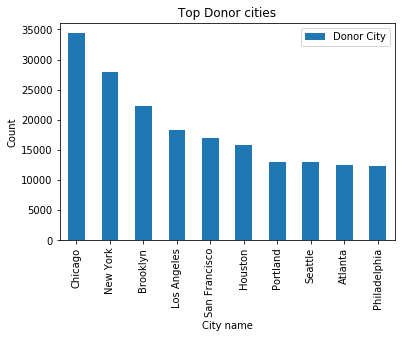

In [27]:
temp = donors['Donor City'].value_counts().to_frame().head(10)
temp.plot( kind='bar', title = 'Top Donor cities')
plt.xlabel('City name')
plt.ylabel('Count')


### Top Donor States

Text(0,0.5,'Count')

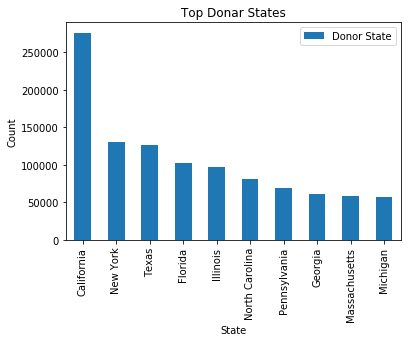

In [28]:
temp = donors["Donor State"].value_counts().to_frame().head(10)
temp.plot(kind= 'bar', title = 'Top Donar States')
plt.xlabel('State')
plt.ylabel('Count')

##### Donor is Teacher or Non Teacher

(-1.107229591987785,
 1.1073072035661398,
 -1.1054775555831031,
 1.1002608359801478)

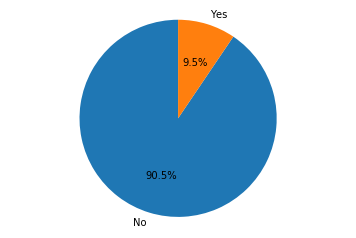

In [29]:
df = donors['Donor Is Teacher'].value_counts().reset_index().set_axis(['Teacher/NoTeacher', 'Counts'], axis=1, inplace=False)
plt.pie(df['Counts'],labels = df['Teacher/NoTeacher'],autopct='%1.1f%%',startangle=90)
plt.axis('equal')

#### Statewise Teacher Vs Non Teacher donors

In [30]:
df = donors.groupby(['Donor State','Donor Is Teacher'])['Donor State'].count().reset_index(name="count")
#df.head()
#df.plot(kind='bar',x='Donor State')
#plt.rcParams['figure.figsize']  = [40,20]
#plt.show()

#sns.countplot(x="Donor State", hue="Donor Is Teacher", data = df)


#### Yearly Donations trend 

Text(0.5,1,'Trend of Donors from 2012 till date')

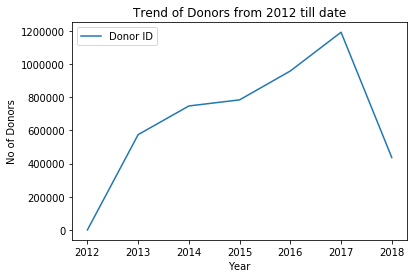

In [31]:
donations['Donation Received Date'] = pd.to_datetime(donations['Donation Received Date'])
donations['year'] = donations['Donation Received Date'].dt.year
temp = donations.groupby('year').agg({'Donor ID' : 'count'})
temp.plot()
plt.xlabel('Year')
plt.ylabel('No of Donors')
plt.title('Trend of Donors from 2012 till date')


#### Donation Received Days

Text(0.5,1,'Donation Received Days')

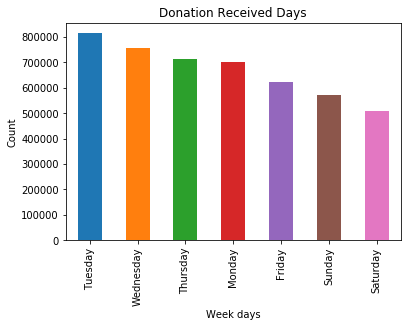

In [32]:
donations['weekday'] = pd.to_datetime(donations['Donation Received Date']).dt.weekday_name
#donations.head()
temp = donations['weekday'].value_counts()
temp.plot(kind='bar')
plt.xlabel('Week days')
plt.ylabel('Count')
plt.title('Donation Received Days')

Number of donations are more in weekdays compared to weekend

#### Top 20 Project categories

Text(0.5,1,'Project Subject Category')

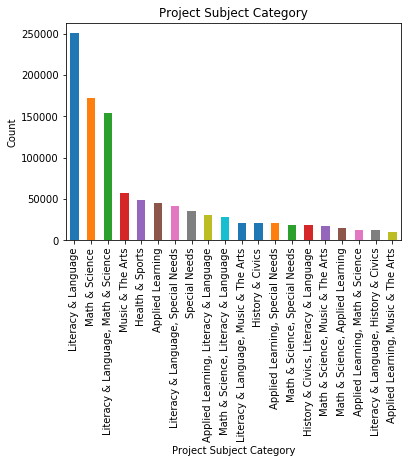

In [33]:
temp = projects['Project Subject Category Tree'].value_counts().head(20)
temp.plot(kind='bar')
plt.xlabel('Project Subject Category')
plt.ylabel('Count')
plt.title('Project Subject Category')


#### Top 20 Project Subject Subcategory Tree

Text(0.5,1,'Project Subject Subcategory')

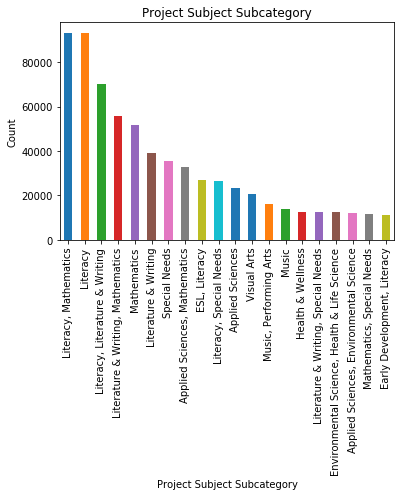

In [34]:
temp = projects['Project Subject Subcategory Tree'].value_counts().head(20)
temp.plot(kind='bar')
plt.xlabel('Project Subject Subcategory')
plt.ylabel('Count')
plt.title('Project Subject Subcategory')

In [35]:
# Different type of project Type
projects['Project Type'].unique()

array(['Teacher-Led', 'Professional Development', 'Student-Led'],
      dtype=object)

Text(0.5,1,'Project Type')

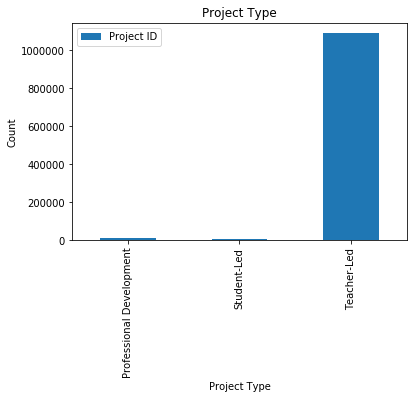

In [36]:
temp = projects.groupby(['Project Type']).agg({'Project ID': 'count'})
temp.plot(kind='bar')
plt.ylabel('Count')
plt.title('Project Type')

(-1.1097710877552853,
 1.118935927115121,
 -1.1139929991514457,
 1.1006663376726904)

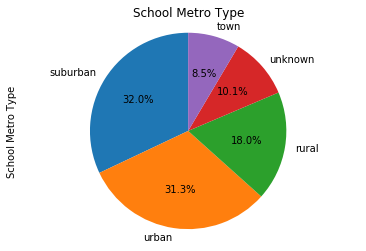

In [37]:
temp = schools['School Metro Type'].value_counts()
temp.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('School Metro Type')
plt.axis('equal')

Most of the schools are from suburban

In [38]:
teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


(-1.101599345967975, 1.117958359008761, -1.1014599067981505, 1.100069519387178)

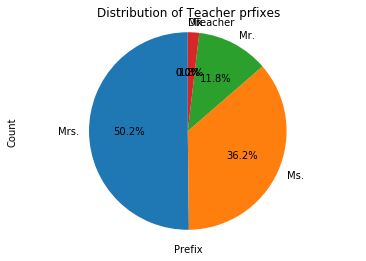

In [39]:
temp = teachers['Teacher Prefix'].value_counts()
temp.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.xlabel('Prefix')
plt.ylabel('Count')
plt.title('Distribution of Teacher prfixes')
plt.axis('equal')

86.4% Teacher who posted the projects are females

Text(0.5,1,'Project posted Day')

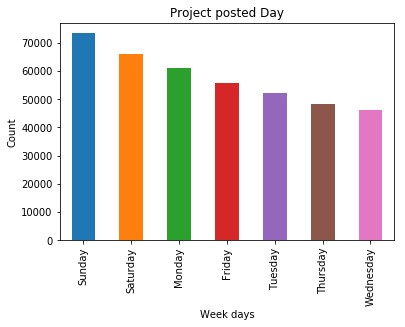

In [40]:
teachers['weekday'] = pd.to_datetime(teachers['Teacher First Project Posted Date']).dt.weekday_name
temp = teachers['weekday'].value_counts()
temp.plot(kind='bar')
plt.xlabel('Week days')
plt.ylabel('Count')
plt.title('Project posted Day')

Most of the projects are posted on Sunday and saturdays.

#### Project Current status

(-1.1203503464225992,
 1.108251444856074,
 -1.119776058877217,
 1.1009417170893914)

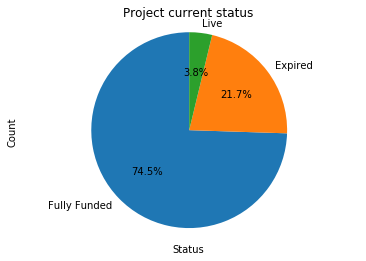

In [42]:
temp = projects['Project Current Status'].value_counts()
temp.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Project current status')
plt.axis('equal')

74.5% projects are fully funded

#### Projects take minimum     days to and maximum   days to get fully funded.

## Summary

1. Total donation amount raised by Donorchoose is  $284408243.28
2. Minimun Donation amount is USD 0.01 , Mean donation amount is  USD 60.67 and Maximum donation amount is USD 60000
3. Top Donor cities include Chicago, New York, Brooklyn, Los Angeles and San Francisco
4. Top donor state is California, New York, Texas Florida and Illinois
5. 9.5 % Donors are teacher and 90.5% are non teacher.
6. Yearly Donations trend show clearly that No of Donors are increasing
7. donations are mostly recevied on working days like tuesday and wednesdays.
8. Top Project sub-categories are : Literacy & Language , Math & Science , Music & Arts.
9. Top Project subject Sub-categories are : Literacy , Mathmatics & Writing.
10. Most of the projects are led by Teacher and very small amount of projects are Professional Development and Student Led.
11. Metro categories
    - Suburban - having 31.5 % schools
    - Urban - having 31.2 % schools
    - Rural - having 17.8 % schools
    - Town - having 8.38 % schools
    - Unknown - 11.1 % schools
12. 86.4% Teacher who posted the projects are females
13. Top week days when teachers posted thier first project :
Sunday - Approx. 73 K
Saturday - Approx. 66 K
Monday - Approx. 61 K
14. Project Status:
    - Fully Funded - 74.5%
    - Expired - 21.5%
    - Live - 3.8%

### Statistical Inference:

Hypothesis Test:

Null hypothesis: Project cost for Math and Science is equal to Literacy and Language

Alternative hypothesis: Project cost for Math and Science is not equal to Literacy and Language

In [5]:
df_math = projects.loc[projects['Project Subject Category Tree'] == 'Math & Science',['Project Cost']]
df_literacy = projects.loc[projects['Project Subject Category Tree'] == 'Literacy & Language',['Project Cost']]

In [6]:
# Lets do t test method
race_ttest, race_pval = stats.ttest_ind(a=df_math, b=df_literacy, equal_var=False)
print('The T-Statistic is %d with a p-value of %s using t test' %(abs(race_ttest), race_pval))

The T-Statistic is 73 with a p-value of [0.] using t test


As seen above pvalue is < 0.05 so null hypothesis is rejected. Project cost for Math and Science is not equal to Literacy and Language